# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

1. Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
Tokenized: Camping, in, Maine, for, the, weekend, ., Hey, Dad, ,, Mama, Loves, YOU, :, http://www.mamapalooza.com

2. Its american tradition bitch
Tokenized: Its, american, tradition, bitch

3. @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
Tokenized: @ThroughTheVoid, They, love, it, !, The, only, pleasure, they, get, in, life, ., I, actually, do, that, ., I'm, sure, I, hear, a, tiny, squeak, ..., Then, louder, ones

4. " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
Tokenized: ", RT, @latti, :, @AbsoHilare, stop, tweeting, in, church, !, Lol, <, ---, "", I, tweet, because, I'm, happy, ,, I, tweet, because, I'm, free, "", LOL, !, "

5. Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
Tokenized: Samsung, Mini, S2, portable, HDD, graced, with, colors, that, perfectly, match, your, tacky, beach, gear, :, Sammy's, done, it, aga, .., http://tinyurl.com/lb5p6m

6. @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
Tokenized: @dialloc, congrats, on, finding, your, way, over, ., it, may, be, slow, going, at, first, ., hang, in, there, ., it's, kinda, cool, when, u, get, up, to, speed.

7. iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
Tokenized: iPhone, activation, delays, continue, ,, Apple, offers, $30, http://twt.gs/l3Ki

8. RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
Tokenized: RT, @GoogleAtWork, Gmail, maximum, attachment, size, now, 25MB, http://bit.ly/62mjw, Nice, !!

9. RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
Tokenized: RT, @acfou, The, Ads, Won, Awards, for, Crispin, ;, But, Did, Nothing, for, Client, BurgerKing's, Sales/Marketshare, -, Big, Surprise, -, http://ping.fm/vw8TI

10. Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
Tokenized: Hey, doll, !, Great, I, missed, True, Blood, yday, boo, lol, Rt, @FrankBanuat78, @jhillstephens, Hello, Sunshine, how, are, u, today, ?, :-)

11. Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
Tokenized: Australian, artist, Pogo, made, these, free, songs, primarily, from, sampled, audio, from, Alice, In, Wonderland, ., http://www.last.fm/music/Pogo/Wonderland

12. @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
Tokenized: @mppritchard, they, wanted, to, sell, all, the, preorders, &, then, sell, all, of, the, ones, they, had, in, stock, to, those, that, just, walked, in, ., Can't, do, both

13. Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
Tokenized: Incoming, :, Frightened, Rabbit, ,, Sept., 22, (, Tucson, ), :, If, Fat, Cat, Records, is, going, to, send, three, great, bands, from, Scot, .., http://tinyurl.com/nz6xcv

14. Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
Tokenized: Hey, @ginoandfran, please, greet, philip, !, (, GinoandFran, live, >, http://ustre.am/2YyQ, )

15. Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
Tokenized: Ik, weet, niet, wie, er, achter, de, T-Mobile, iPhone, Twitter, zit, maar, ik, vind, het, niet, echt, 'corporate', taalgebruik, ..., Best, vreemd, eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [94]:
from collections import defaultdict
from typing import List

class BPETokenizer:
    """
    Byte Pair Encoding (BPE) Tokenizer class.

    Args:
    - vocab_size (int): The desired size of the vocabulary.

    Methods:
    - train(corpus: List[str]) -> None: Train the tokenizer on the given corpus.
    - tokenize(text: str) -> List[str]: Tokenize the input text based on the trained BPE model.
    """

    def __init__(self, vocab_size: int) -> None:
        """
        Initialize the BPETokenizer.

        Args:
        - vocab_size (int): The desired size of the vocabulary.
        """
        self.vocab_size = vocab_size
        self.merges = {}
        self.vocab = []
        self.special_token = ""

    def train(self, corpus: List[str]) -> None:
        """
        Train the BPE model on the given corpus.

        Args:
        - corpus (List[str]): List of strings representing the training data.
        """
        # Compute base vocabulary
        alphabet = set()

        for word in corpus:
            for letter in word:
                alphabet.add(letter)

        self.vocab = [""] + sorted(list(alphabet))

        # Split each word into individual characters
        splits = {word: [c for c in word] for word in corpus}

        # Train the BPE model
        vocab_size = self.vocab_size

        while len(self.vocab) < vocab_size:
            pair_freqs = self.compute_pair_freqs(splits)
            best_pair = ""
            max_freq = None
            for pair, freq in pair_freqs.items():
                if max_freq is None or max_freq < freq:
                    best_pair = pair
                    max_freq = freq
            splits = self.merge_pair(*best_pair, splits)
            self.merges[best_pair] = best_pair[0] + best_pair[1]
            self.vocab.append(best_pair[0] + best_pair[1])

    def compute_pair_freqs(self, splits):
        """
        Compute frequencies of pairs in the given splits.

        Args:
        - splits: A dictionary with words as keys and their splits as values.

        Returns:
        - pair_freqs: A dictionary with pairs as keys and their frequencies as values.
        """
        pair_freqs = defaultdict(int)
        for word in splits.keys():
            split = splits[word]
            if len(split) == 1:
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                pair_freqs[pair] += 1
        return pair_freqs

    def merge_pair(self, a, b, splits):
        """
        Merge occurrences of the specified pair in the given splits.

        Args:
        - a: First character of the pair.
        - b: Second character of the pair.
        - splits: A dictionary with words as keys and their splits as values.

        Returns:
        - splits: Updated splits after merging occurrences of the specified pair.
        """
        for word in splits.keys():
            split = splits[word]
            if len(split) == 1:
                continue

            i = 0
            while i < len(split) - 1:
                if split[i] == a and split[i + 1] == b:
                    split = split[:i] + [a + b] + split[i + 2 :]
                else:
                    i += 1
            splits[word] = split
        return splits

    def tokenize(self, text: str) -> List[str]:
        """
        Tokenize the input text based on the trained BPE model.

        Args:
        - text (str): Input text to be tokenized.

        Returns:
        - splits: List of tokens obtained from the input text.
        """
        splits = [c for c in text]

        for pair, merge in self.merges.items():
            i = 0
            while i < len(splits) - 1:
                if splits[i] == pair[0] and splits[i + 1] == pair[1]:
                    splits = splits[:i] + [merge] + splits[i + 2 :]
                else:
                    i += 1

        return splits


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

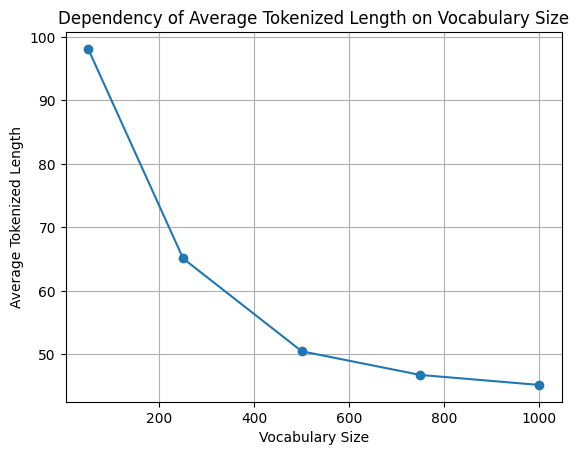

In [92]:
def get_avg_length(trains, tests, vocab_sizes):

    avg_lengths = []

    for vocab_size in vocab_sizes:
        bpe = BPETokenizer(vocab_size)
        bpe.train(trains)
        
        length = 0
        overall_length = len(tests)
        
        for test in tests:
            tokens = bpe.tokenize(test)
            
            length += len(tokens)

        avg_lengths.append(length / overall_length)
    return avg_lengths

# Read tweets from files
train_file_paths = [
    "/Users/damirabdulaev/Downloads/Assignment1_data/file1",
    "/Users/damirabdulaev/Downloads/Assignment1_data/file2",
    "/Users/damirabdulaev/Downloads/Assignment1_data/file3",
    "/Users/damirabdulaev/Downloads/Assignment1_data/file4",
]

test_file_paths = ["/Users/damirabdulaev/Downloads/Assignment1_data/file5"]

train_tweets = read_tweets_from_files(train_file_paths)
test_tweets = read_tweets_from_files(test_file_paths)

# Define vocabulary sizes to analyze
vocab_sizes = [50, 250, 500, 750, 1000]

# Use the provided function to get average token lengths
avg_lengths = get_avg_length(train_tweets, test_tweets, vocab_sizes)

# Plot the results
plt.plot(vocab_sizes, avg_lengths, marker='o')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Length')
plt.title('Dependency of Average Tokenized Length on Vocabulary Size')
plt.grid(True)
plt.show()

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

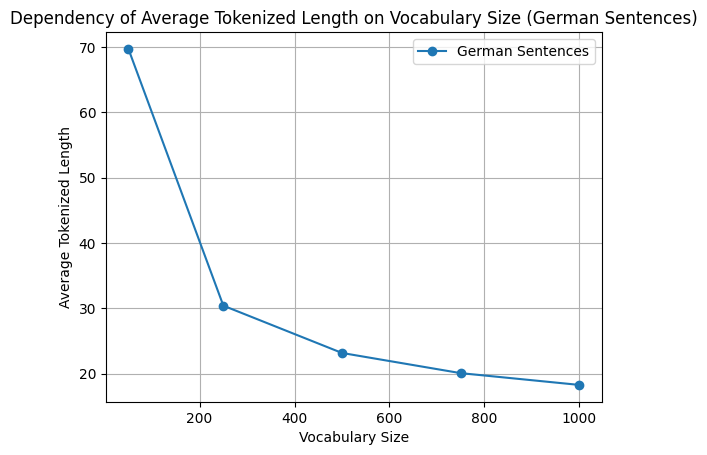

In [90]:
# Function to read sentences from the German dataset
def read_german_sentences(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.readlines()

# Read German sentences from the provided dataset
german_dataset_path = "/Users/damirabdulaev/Downloads/train.de"
german_sentences = read_german_sentences(german_dataset_path)

# Define vocabulary sizes to analyze
vocab_sizes = [50, 250, 500, 750, 1000]

# Use the provided function to get average token lengths for German sentences
avg_lengths_german = get_avg_length(german_sentences, german_sentences, vocab_sizes)

# Plot the results for German sentences
plt.plot(vocab_sizes, avg_lengths_german, marker='o', label='German Sentences')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Length')
plt.title('Dependency of Average Tokenized Length on Vocabulary Size (German Sentences)')
plt.legend()
plt.grid(True)
plt.show()

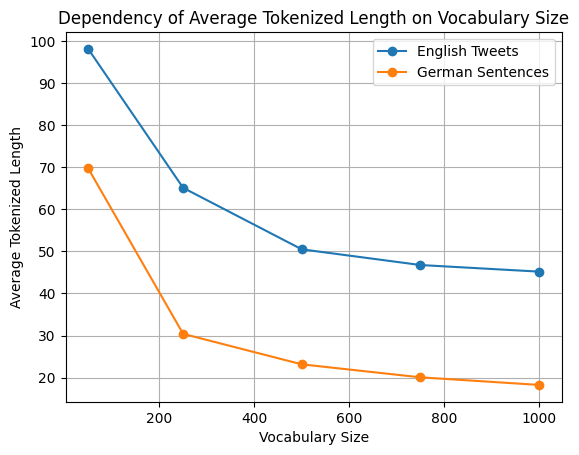

In [93]:
# Plot the results for both English tweets and German sentences
plt.plot(vocab_sizes, avg_lengths, marker='o', label='English Tweets')
plt.plot(vocab_sizes, avg_lengths_german, marker='o', label='German Sentences')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Length')
plt.title('Dependency of Average Tokenized Length on Vocabulary Size')
plt.legend()
plt.grid(True)
plt.show()


The observed difference in average tokenized length between the German and English datasets can be attributed to the inherent linguistic dissimilarities between the languages. German words often contain more morphemes and are, on average, longer than their English equivalents. Additionally, the unique structural characteristics of the German language, such as compound words and inflections, contribute to more efficient subword representations during tokenization. The larger size of the German dataset may amplify the BPE tokenizer's ability to identify and merge frequent subword pairs, resulting in a more concise representation of sentences. The interplay of these factors underscores the language-specific challenges and opportunities inherent in subword tokenization across diverse linguistic contexts.